In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from warnings import filterwarnings

In [2]:
from sklearn import datasets
iris  = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = pd.DataFrame(iris.target, columns=['target'])
print(Y[:5])
print(iris.target_names[Y][:5])
print(np.unique(iris.target_names[Y]))

   target
0       0
1       0
2       0
3       0
4       0
[['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]
['setosa' 'versicolor' 'virginica']


In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
Y.value_counts()

target
0         50
1         50
2         50
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)


In [6]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=2, criterion='entropy',
                               max_depth=5, min_samples_split=4,
                               min_samples_leaf=3)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)

In [7]:
tree_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [8]:
print("Accruacy score:", accuracy_score(Y_train, tree.predict(X_train)))

Accruacy score: 0.9821428571428571


In [9]:
print("Accuracy score:", accuracy_score(Y_test, tree_pred))

Accuracy score: 0.9736842105263158


In [10]:
#confusion matrix
cm = confusion_matrix(Y_test, tree_pred)
print("Confusion Matrix: \n", cm)
print(classification_report(Y_test, tree_pred))

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



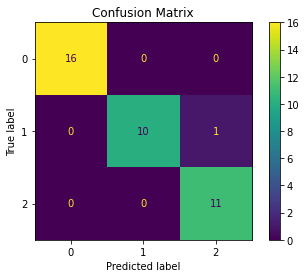

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix")
plt.show()


In [12]:
print(iris.feature_names)
tree.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.        , 0.        , 0.09414161, 0.90585839])

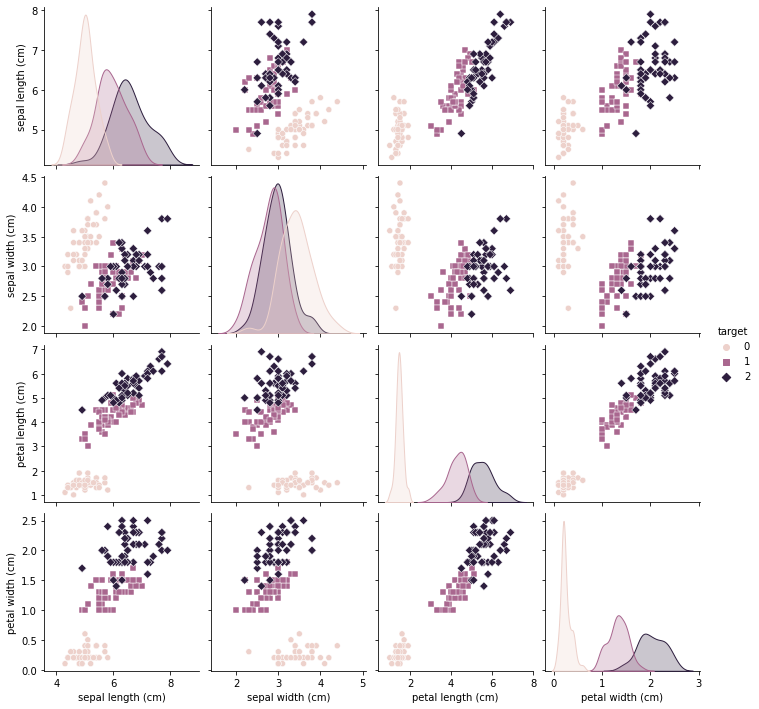

In [13]:
sns.pairplot(pd.concat([X,Y], axis=1), hue='target', markers=["o", "s", "D"])

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\nentropy = 1.582\nsamples = 112\nvalue = [34, 39, 39]\nclass = 1'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = 0'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.65\nentropy = 1.0\nsamples = 78\nvalue = [0, 39, 39]\nclass = 1'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]\nclass = 1'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = 1'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = 2'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]\nclass = 2'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = 2'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = 2')]

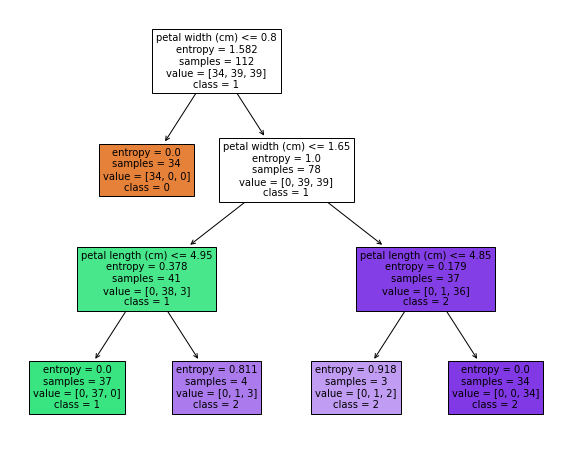

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree, feature_names=iris.feature_names, class_names=['0', '1','2'], filled=True)

In [17]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
GNB_pred = GNB.predict(X_test)

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
print("Accuracy score: ", accuracy_score(Y_test, GNB_pred))

Accuracy score:  0.9736842105263158


In [19]:
cm = confusion_matrix(Y_test, GNB_pred)
print("Confusion Matrix: \n", cm)
print(classification_report(Y_test, GNB_pred))

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [20]:
#ROC
y_score = GNB.predict_proba(X_test)
print(GNB_pred[:5])
print(y_score[:5,])

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)
print(y_onehot_test[:5])

[0 0 2 0 0]
[[1.00000000e+000 5.66154178e-016 1.00579871e-024]
 [1.00000000e+000 1.11107041e-015 1.55121749e-024]
 [4.82690754e-193 1.30762037e-002 9.86923796e-001]
 [1.00000000e+000 1.20232752e-016 1.54883871e-025]
 [1.00000000e+000 1.52094889e-012 9.19312726e-021]]
[[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]]


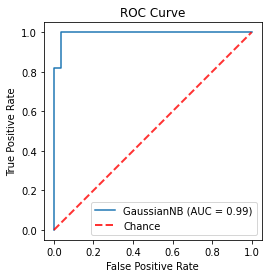

In [26]:
#displaying roc curve 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_onehot_test[:,2], y_score[:,2],
                                 name='GaussianNB')
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.axis('square')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()